# <center>Predicting Wine Quality<center>

This project was done as part of a course called Introduction to Machine Learning, organized by the university of Jyväskylä.

In this project my goal is to develop a machine learning model that predicts the quality of wine. The data set consists of 30 000 different wine samples described by 11 objectively measured physiochemical input variables. The response variable represents the quality of the wine and is assessed through a scoring system provided by experts.

<br>

# <center>Exploratory Data Analysis<center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/testi/Desktop/ML perusteet/train_set_ht.csv", index_col=0)

In [3]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,y
0,62.80,6.15,10.96,22.4,5.155,68.5,730.8,17.930763,24.48,7.50,36.6,5.0
1,59.76,6.20,10.16,76.8,5.235,792.5,1455.3,17.936658,25.74,7.35,34.8,7.0
2,61.84,5.80,10.00,90.4,5.235,209.0,1292.4,17.967024,25.20,7.00,31.8,6.0
3,60.64,6.40,10.32,91.2,5.275,263.5,1818.0,17.953479,25.86,7.35,34.5,6.0
4,70.72,8.35,10.32,28.8,5.160,15.0,664.2,17.916048,24.30,6.45,39.6,5.0


In [4]:
df.shape

(30000, 12)

In [5]:
# Range of the response variable
print(df["y"].min())
print(df["y"].max())

3.0
8.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      29695 non-null  float64
 1   x2      29699 non-null  float64
 2   x3      29679 non-null  float64
 3   x4      29698 non-null  float64
 4   x5      29681 non-null  float64
 5   x6      29725 non-null  float64
 6   x7      29694 non-null  float64
 7   x8      29691 non-null  float64
 8   x9      29684 non-null  float64
 9   x10     29712 non-null  float64
 10  x11     29703 non-null  float64
 11  y       29685 non-null  float64
dtypes: float64(12)
memory usage: 3.0 MB


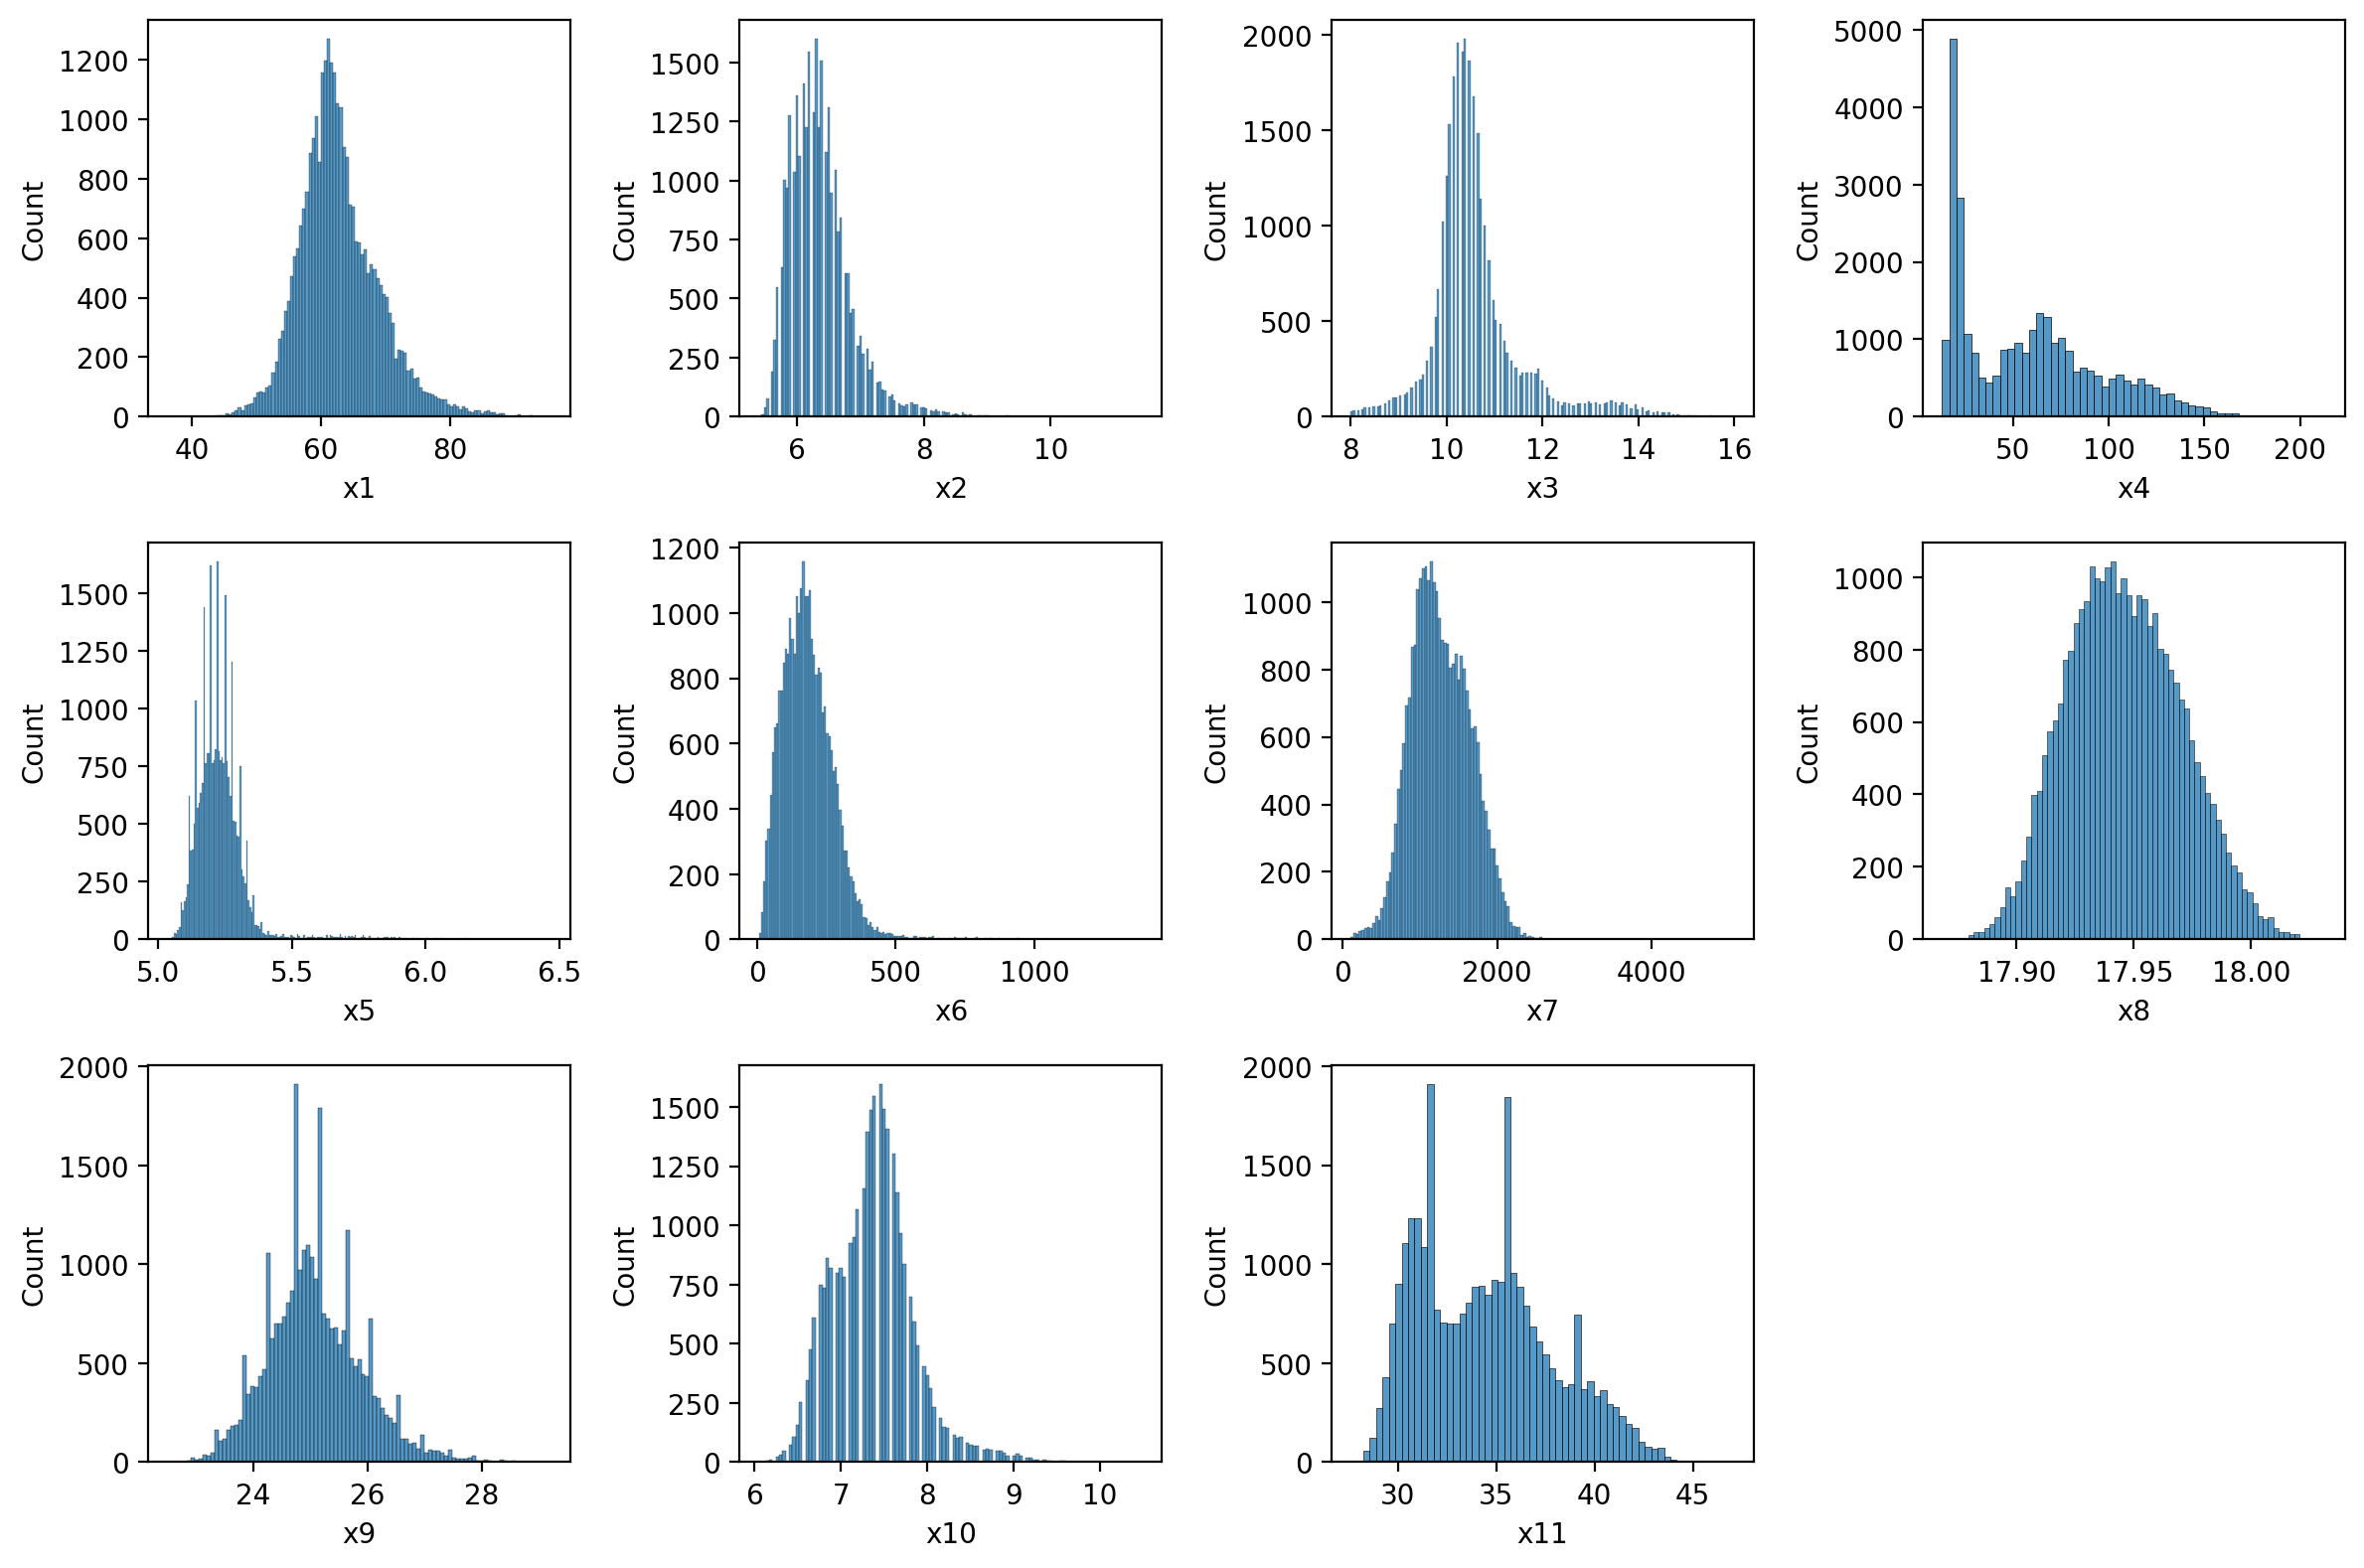

In [7]:
# Check the shapes of the distributions of each column

cols = ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11"]
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12, 8), dpi=200)
ax = ax.flatten()
i = 0

for j in cols:
    sns.histplot(df[j], ax=ax[i])
    i += 1
    
fig.delaxes(ax[11])
plt.tight_layout()

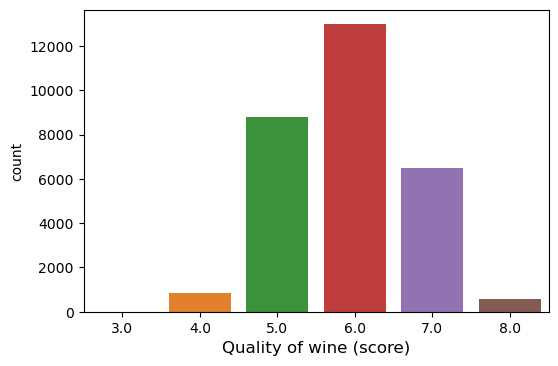

In [8]:
plt.figure(figsize=(6, 4), dpi=100)
sns.countplot(x="y", data=df)
plt.xlabel("Quality of wine (score)", size=12);

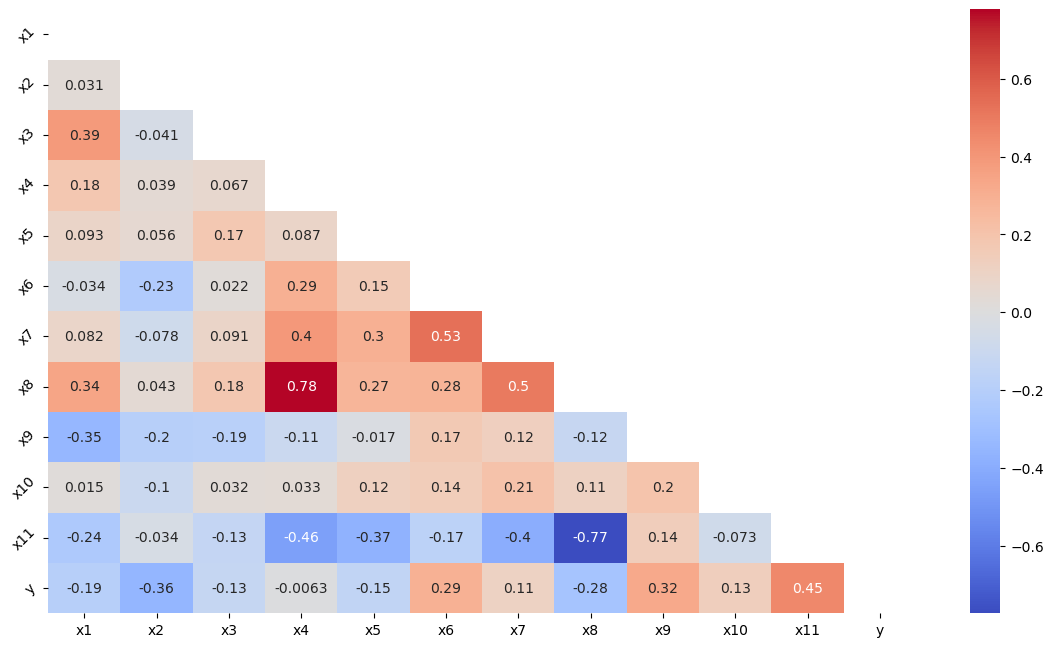

In [9]:
# A heatmap of the correlations between the variables
plt.figure(figsize=(14, 8), dpi=100)
corr_arr = df.corr()
mask = np.triu(np.ones_like(corr_arr, dtype=bool))
sns.heatmap(corr_arr, annot=True, cmap="coolwarm", mask=mask)
plt.yticks(rotation=45);

In [10]:
# Check how many missing values each column of the dataframe has
df.isnull().sum()

x1     305
x2     301
x3     321
x4     302
x5     319
x6     275
x7     306
x8     309
x9     316
x10    288
x11    297
y      315
dtype: int64

In [11]:
def percent_missing(df):
    """
    Calculate the percentage of missing values for each column in the DataFrame.
    
    Parameters:
        df (pandas.DataFrame): The input DataFrame.
        
    Returns:
        pandas.Series: A Series containing the percentage of missing values for each column.
        
    """
    percent_nan = (df.isnull().sum() / len(df)) * 100
    return percent_nan

In [12]:
percent_missing(df)

x1     1.016667
x2     1.003333
x3     1.070000
x4     1.006667
x5     1.063333
x6     0.916667
x7     1.020000
x8     1.030000
x9     1.053333
x10    0.960000
x11    0.990000
y      1.050000
dtype: float64

- Each column seems to be missing about 1% of the values.

Typically, missing data values are **imputed** into the data, which means **estimating their values from the available data**. An extreme case would be to remove all incomplete observations, but this often leads to significant data loss, especially if there are many variables. Complete-case analysis (i.e. using only data points that have complete information) is a simple method, but it has some risks. In particular, if the variables under analysis are statistically related to the missingess, then ignoring the missing data (i.e. deleting it) will include bias in one's inferences.
The simplest imputation method would be just to replace the missing values with variable-specific summary statistics calculated from the available values, such as mean, median, or mode. This method of replacing the missing values with summary statistics from the available values, however, can lead to severely biased estimates.

The missingness of the data can have different underlying mechanisms, which can be categorized into three types:

**MCAR** (*missing completely at random*)
- The probability that a variable value is missing does not depend on the observed data values nor on the missing data values [i.e. P(missing | complete data) = P(missing)]. The missingness results from a process completely unrelated to the variables in one's analyses, or from a completely random process (similar to flipping a coin or rolling a die). MCAR is the easiest case for machine learning models because there is no systematic mechanism behind it, and the missing values occur randomly regardless of their own or other variable values. 


**MAR** (*missing at random*)
- The probability that a variable value is missing partly depends on other data that are observed in the dataset, but does not depend on any of the values that are missing [i.e. P(missing | complete data) = P(missing | observed data)].

**MNAR** (*missing not at random*)
- The probability that a variable value is missing depends on the missing data values themselves \
[i.e. P(missing | complete data) $\ne$ P(missing | observed data)]. MNAR is the most challenging case because the missingness depends on the variable itself.

Since *MCAR* is the easiest case to deal with in machine learning, one should start by determining whether or not the missing values are *MCAR*. This can be done by using **Little's MCAR test.**

<br>

**Little's MCAR Test**

As far as i know, Python does not provide a function for Little's MCAR test. Therefore, i used R's **naniar** package which comes with a **mcar_test** function. Below is the implementation of it (description of the Little's MCAR test and the respective results).

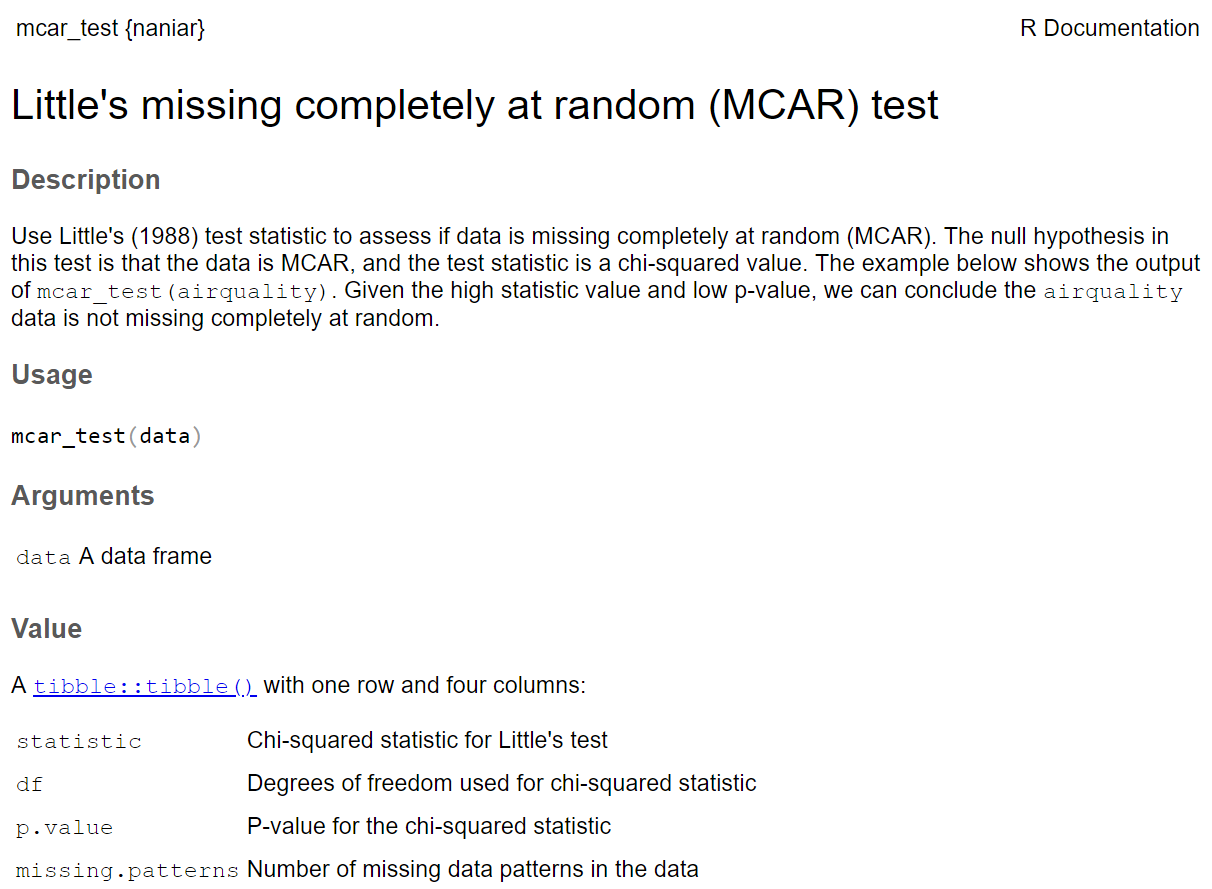

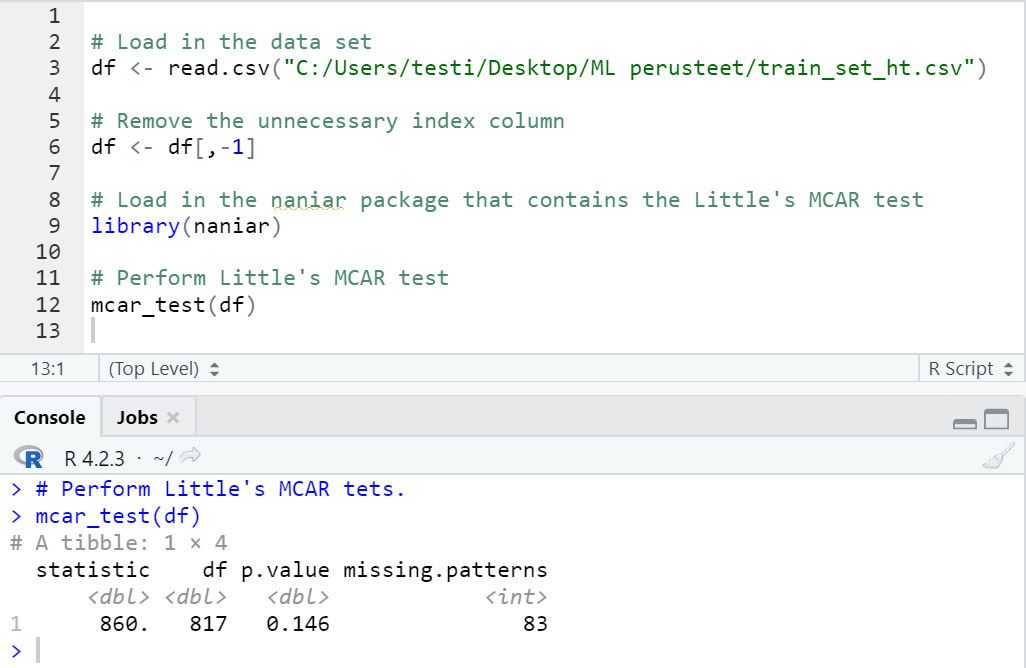

In Little's MCAR test the hypotheses are

$H_0 : \,$ The data are MCAR \
$H_1 : \,$ The data are not MCAR

$\boldsymbol{\rightarrow}$ Since the **p-value of 0.146** is clearly larger than any commonly used threshold for rejecting the null hypothesis \
(i.e. the large p-value indicates that there is not enough evidence to reject the null hypothesis), it is safe to assume that **the data are MCAR.**

In the cases where the data are *MCAR*, one can for example use the **kNN imputation method**.

The k-Nearest Neighbors (kNN) imputation method is a technique used to fill in missing values in a dataset by leveraging the values of its nearest neighbors. The fundamental idea behind this method is to impute missing values based on observations that are most similar to the one with the missing value.

In the cases of continuous variables, the distance is typically calculated using the Euclidean distance. The distance can be calculated based on the available values. The missing values can be replaced by the average of the available values of the k nearest neighbors or weighted average based on the distances to the neighbors.

If there are multiple missing values in the same input vector, different sets of nearest neighbors may be needed to impute them, as the neighbors themselves may have missing values. If a variable has missing values in all input vectors, the variable needs to be effectively removed.

It is crucial to assess the quality and reliability of the imputed values after completing the imputation process. The assessment involves considering the overall distribution of the imputed data and comparing it to the original data. Evaluating the imputed values allows for identifying potential biases or anomalies that may have been introduced during the imputation.

Scikit-learn's impute module has a KNNImputer class, which can be used for the kNN imputation.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error

Let's try out 50 different K values and see which one produces the smallest error when fitting the linear regression model and evaluating its performance.

$\boldsymbol{\rightarrow} \,$ We will choose the K value for the KNNImputer that produces the smallest error when evaluating the performance of the fitted model (where the data was imputed using the respective K value).

In [14]:
error_rates = []

for k in range(1, 51):
    
    # The data frame needs to be returned to its original form after imputating it with \
    # each K value (otherwise there is nothing to imputate after the first iteration).
    df = pd.read_csv("C:/Users/testi/Desktop/ML perusteet/train_set_ht.csv", index_col=0)

    # Create the kNN imputation object with K=k
    imputer = KNNImputer(n_neighbors=k, weights="uniform")

    # Impute the data
    df = imputer.fit_transform(df)

    # Create a scaler object
    scaler = StandardScaler()

    # Design matrix
    X = df[:, :-1]

    # Response variable
    y = df[:, -1]

    # Perform train test split
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size=0.3, 
                                                        random_state=42)

    # Fit the scaler to the TRAINING data
    scaler.fit(X_train)

    # We scale the feature values (X_train and X_test), but not the label values (y_train and y_test)
    scaled_X_train = scaler.transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    # Create a linear regression object
    model = LinearRegression()

    # Fit the model on the TRAINING data
    model.fit(scaled_X_train, y_train)

    # Make predictions for performance evaluation.
    # Note that the predictions are made using the test data.
    y_pred = model.predict(scaled_X_test)
    
    # Evaluate the performance (calculate the error)
    error = mean_squared_error(y_test, y_pred)
    
    # Append the error and the corresponding K value (as a tuple) to the error_rates list
    error_rates.append((f"K={k}", f"MSE={error}"))

In [15]:
error_rates

[('K=1', 'MSE=0.35038506654801954'),
 ('K=2', 'MSE=0.3467768030072405'),
 ('K=3', 'MSE=0.3451081085309281'),
 ('K=4', 'MSE=0.34434642248983055'),
 ('K=5', 'MSE=0.34387560828317115'),
 ('K=6', 'MSE=0.3430859012763758'),
 ('K=7', 'MSE=0.3429283913728718'),
 ('K=8', 'MSE=0.34266904029852047'),
 ('K=9', 'MSE=0.34247822912205944'),
 ('K=10', 'MSE=0.3423784768426797'),
 ('K=11', 'MSE=0.342468388573408'),
 ('K=12', 'MSE=0.3425045181274263'),
 ('K=13', 'MSE=0.34247872349603825'),
 ('K=14', 'MSE=0.34240259039022597'),
 ('K=15', 'MSE=0.34233601717295253'),
 ('K=16', 'MSE=0.3423315604945196'),
 ('K=17', 'MSE=0.34231685391336286'),
 ('K=18', 'MSE=0.34242615818584693'),
 ('K=19', 'MSE=0.3425069713267092'),
 ('K=20', 'MSE=0.3424961427466384'),
 ('K=21', 'MSE=0.34245552398421497'),
 ('K=22', 'MSE=0.34251528594860065'),
 ('K=23', 'MSE=0.3424913730241531'),
 ('K=24', 'MSE=0.3424219502400784'),
 ('K=25', 'MSE=0.34242143775560485'),
 ('K=26', 'MSE=0.3424778307945375'),
 ('K=27', 'MSE=0.3424778490302413')

In [16]:
# We want to minimize the error, 
# so we use min() together with lambda function to return the smallest error.
min(error_rates, key=lambda x: x[1])

('K=17', 'MSE=0.34231685391336286')

- It seems that the smallest error is achieved when the number of neighbors is 17.
- However, as one can see, the differences between the errors are not significant.
- Therefore, it is probably not worth to choose K=17, since this adds unwanted complexity to the model.
- Let's choose K=5.

<br>

# <center>Linear Regression<center>

Now, since we have the K value chosen for the KNNImputation, let's imputate the whole data set.

In [17]:
# Change the data frame back to its original form
# (currently it is imputed with K=50).
df = pd.read_csv("C:/Users/testi/Desktop/ML perusteet/train_set_ht.csv", index_col=0)

In [18]:
Imputer = KNNImputer(n_neighbors=5, weights="uniform")

In [19]:
df = Imputer.fit_transform(df)

In [20]:
np.isnan(df).any()

False

In [21]:
# Design matrix
X = df[:, :-1]

# Response variable
y = df[:, -1]

In [22]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [23]:
print(f"X_train dimensions: {X_train.shape}")
print(f"y_train dimensions: {y_train.shape}")
print(f"X_test dimensions: {X_test.shape}")
print(f"y_test dimensions: {y_test.shape}")

X_train dimensions: (21000, 11)
y_train dimensions: (21000,)
X_test dimensions: (9000, 11)
y_test dimensions: (9000,)


In [24]:
# SCALE THE DATA

# Create the scaler object
scaler = StandardScaler()

# Since we don't want to assume any information about the test set,
# we fit the scaler object only to the TRAINING data.
scaler.fit(X_train)

# Transform the feature data. 
# Note that as said before, we don't scale the label data.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<br>

**<center>Determining the regularization technique for linear regression<center>**

**L2 Regularization (Ridge regression)**.

L2 regularization adds a penalty equal to the **square** of the magnitude of the coefficients.
- All coefficients are shrunk by the same factor.
- This does not necessarily eliminate the coefficients (they don't necessarily become zero).
- The goal of ridge regression is to help prevent overfitting by adding an additional penalty term to RSS.

Mathematically L2 regularization can be written as

$$ \displaystyle \large {\sum_{i=1}^{n}} \left(y_i - \beta_0 - \sum_{j=1}^p \beta_jx_{ij}\right)^2 + \lambda {\sum_{j=1}^{p}} \beta_j^2 = RSS + \lambda {\sum_{j=1}^{p}} \beta_j^2 $$

where $ \displaystyle \lambda {\sum_{j=1}^{p}} \beta_j^2 $ is the **penalty term**, and RSS is the residual sum of squares.

It is clear that $\, \boldsymbol{\lambda} \,$ determines how severe the penalty is. In theory, $\, \boldsymbol{\lambda} \,$ can take any value between **0** and $\boldsymbol{\infty}.$ \
If $\, \boldsymbol{\lambda} = 0 \,$, then the task simply reverts back to minimizing RSS (because the penalty term becomes zero). \
To choose the best value for $\, \lambda \,$ we simply use **cross-validation** to explore multiple options for $\, \lambda \,$, and then choose the best one.

- Note that scikit-learn refers to $\, \large\lambda \,$ as **alpha** parameter within the class call.

In [25]:
from sklearn.linear_model import RidgeCV

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

In [26]:
ridge_cv_model = RidgeCV(alphas=(1e-3, 1e-2, 1e-1, 1), 
                         scoring="neg_mean_absolute_error",
                         cv=None)

- When **cv=None**, scikit-learn automatically uses the efficient **Leave-One-Out cross-validation.** 

**Important note!**
- For cross-validation metrics, sklearn uses a **scorer object**.
- All scorer objects follow the convention that **higher** return values are **better** than lower return values.
- For example higher accuracy (correct predictions in a classification task) is obviously better, but higher MSE is actually worse. 
- So how does sklearn deal with this? Well in the case of MSE for example, sklearn simply uses a negative MSE.

In [27]:
#  Fit the ridge regression to the training data.
# Recall that X_train is already scaled.
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.001, 0.01 , 0.1  , 1.   ]),
        scoring='neg_mean_absolute_error')

- To check that which alpha parameter performed the best, one can use the **alpha_** attribute of the fitted ridge regression model.

In [28]:
ridge_cv_model.alpha_

0.001

In [29]:
# Let's predict the label values based on new unseen data (X_test).
# Recall that X_test is already scaled.
ridge_cv_preds = ridge_cv_model.predict(X_test)

- NOTE that ridge_cv_model automatically uses the best alpha value found in the cross validation process.

In [30]:
# Evaluate performance
mean_squared_error(y_test, ridge_cv_preds)

0.34387560853505533

- Note that this performance evaluation is not based on the scorer metrics anymore. 

    $\boldsymbol{\rightarrow} \,$ Therefore, a lower MSE indicates a better fit to the data.

<br>

**L1 Regularization (LASSO Regression)**

LASSO is an acronym for "least absolute shrinkage and selection operator".

L1 regularization adds a penalty equal to the **absolute value** of the magnitude of the coefficients.
- This limits the size of the coefficients, and can yield sparse models where some of the coefficients can become zero \
(i.e. LASSO can force some of the coefficient estimates to be exactly equal to zero, when the tuning parameter $\boldsymbol{\lambda}$ is sufficiently large)
    
    $\, \boldsymbol{\rightarrow} \,$ Models generated from the LASSO are generally much easier to interpret.
    
Mathematically L1 Regularization looks as follows

$$ \displaystyle \large {\sum_{i=1}^{n}} \left(y_i - \beta_0 - \sum_{j=1}^p \beta_jx_{ij}\right)^2 + \lambda {\sum_{j=1}^{p}} |\beta_j| = RSS + \lambda {\sum_{j=1}^{p}} |\beta_j| $$

where $ \displaystyle \lambda {\sum_{j=1}^{p}} |\beta_j| $ is the **penalty term**, and RSS is the residual sum of squares.

In L1 regularization, similar to L2 regularization, the process of finding the best penalty hyperparameter involves tuning the $\boldsymbol{\lambda}$ coefficient.

In [31]:
from sklearn.linear_model import LassoCV

- Like in RidgeCV, one can provide the alpha values directly to LassoCV as a list. 
- However, if one does not provide these alpha values, they are set automatically within a range.
- To modify the range and the number of alpha values to check, one can alter the **eps** and **n_alphas** parameter. 
- For more information on this, check the link below.
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

In [32]:
lasso_cv_model = LassoCV(eps=0.1, n_alphas=100, cv=5, max_iter=10000)

In [33]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=5, eps=0.1, max_iter=10000)

In [34]:
lasso_cv_model.alpha_

0.037103932126597884

In [35]:
lasso_cv_preds = lasso_cv_model.predict(X_test)

In [36]:
mean_squared_error(y_test, lasso_cv_preds)

0.3639258450525791

In [37]:
print(f"Ridge regression MSE: {mean_squared_error(y_test, ridge_cv_preds)}")
print(f"LASSO regression MSE: {mean_squared_error(y_test, lasso_cv_preds)}")

Ridge regression MSE: 0.34387560853505533
LASSO regression MSE: 0.3639258450525791


- Ridge regression performs slightly better.

<br>

**Combining L1 and L2 (Elastic Net)**

$$ \displaystyle\large\frac{{\sum_{i=1}^{n} (y_i - x_i^J\hat{\beta})^2}} {2n} + \lambda \left(\frac{1 - \alpha} {2} \sum_{j=1}^{m} \hat{\beta}_j^2 + \alpha \sum_{j=1}^{m} |\hat{\beta_j}| \right) $$

The Elastic Net model is a linear regression model that combines the L1 regularization (LASSO) and L2 regularization (Ridge) techniques. 


The Elastic Net model adds a penalty term to the traditional linear regression objective function (RSS, the Residual Sum of Squares, which linear regression aims to minimize), which consists of two components: the L1 norm of the regression coefficients and the L2 norm of the regression coefficients. 
- The L1 norm encourages sparsity in the model by shrinking some coefficients to exactly zero, effectively performing feature selection. 


- The L2 norm encourages small but non-zero coefficients, which helps in handling multicollinearity and stabilizing the model.
    
The Elastic Net model introduces two hyperparameters, **alpha** ($\boldsymbol{\alpha}$) and **lambda** ($\boldsymbol{\lambda}$). 
- The $\boldsymbol{\alpha}$ parameter controls the mixture between L1 and L2 regularization, with a value of 1 representing pure LASSO regression and a value of 0 representing pure Ridge regression.

Since with **elastic net** we have multiple (two) hyperparameters to adjust, let's use **grid search**.
- A **grid search** is a way of training and validating a model on every possible combination of multiple hyperparameter options.
- Scikit-Learn includes a **GridSearchCV** class that is capable of testing a dictionary of multiple hyperparameter options through cross-validation.
- This allows for both cross-validation and a grid search to be performed in a generalized way for any model.

In [38]:
from sklearn.linear_model import ElasticNet

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html


- **IMPORTANT!!** In Sklearn's ElasticNet class, **alpha** parameter is the $\, \large \boldsymbol{\lambda} \,$ constant that controls the overall strength of the regularization (see Elastic Net's equation above), and the value(**s**) of **l1_ratio** parameter controls the mixture between L1 and L2 regularization.

In [39]:
elastic_net_model = ElasticNet()

In [40]:
# Pass the hyperparameters that you want to tune from the ElasticNet class in to a dictionary as keys.
# Note that the keys (as strings) need to match exactly the parameters from the ElasticNet class call.
# Then you pass in the values that you want to check.
# Note that alpha=lambda, l1_ratio=the ratio of how much to use L1 (LASSO) and L2 (Ridge).
# The closer l1_ratio is to 0, the more you use L2 penalty (Ridge).
# Likewise, the closer l1_ratio is to 1, the more you use L1 penalty (LASSO).
# You can pass in a list of values between 0 and 1 to l1_ratio.
# Likewise for the alpha (lambda) parameter you can pass a list of values.

param_grid = {"alpha":[0.1, 1, 5, 10, 50, 100], 
              "l1_ratio": [0.1, 0.5, 0.7, 0.95, 0.99, 1]}

In [41]:
from sklearn.model_selection import GridSearchCV

- So what Grid search does, it tries every single combination of the values  that we provided.
- For example, it's going to try the alpha value of 0.1 with all of the l1_ratio values: 0.1, 0.5, 0.7, 0.95, 0.99 and 1.

In [42]:
# Create the Grid model
grid_model = GridSearchCV(elastic_net_model,
                          param_grid=param_grid,
                          scoring="neg_mean_squared_error",
                          cv=5)

In [43]:
# Fit the Grid model on the training data
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [44]:
# Fetch the best performing model
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.1)

- The **best model** was obtained using an **alpha (lambda) value of 0.1**, and **l1_ratio of 0.1**.

In [45]:
# Info on all of the different combinations of alpha and l1_ratio values
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003590,7.979871e-04,0.000000,0.000000,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-0.357106,-0.370210,-0.358887,-0.363431,-0.357015,-0.361330,0.005014,1
1,0.002793,3.990650e-04,0.000200,0.000399,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-0.382091,-0.397682,-0.384751,-0.392718,-0.385469,-0.388542,0.005769,2
2,0.003192,3.989458e-04,0.000199,0.000399,0.1,0.7,"{'alpha': 0.1, 'l1_ratio': 0.7}",-0.395620,-0.413825,-0.399596,-0.408323,-0.399397,-0.403352,0.006692,3
3,0.002992,1.784161e-07,0.000399,0.000488,0.1,0.95,"{'alpha': 0.1, 'l1_ratio': 0.95}",-0.414665,-0.435041,-0.421125,-0.431419,-0.418826,-0.424215,0.007732,4
4,0.003391,4.885777e-04,0.000598,0.000489,0.1,0.99,"{'alpha': 0.1, 'l1_ratio': 0.99}",-0.417213,-0.437941,-0.424010,-0.434584,-0.421418,-0.427033,0.007913,5
5,0.003195,7.458207e-04,0.000399,0.000489,0.1,1,"{'alpha': 0.1, 'l1_ratio': 1}",-0.417869,-0.438685,-0.424751,-0.435396,-0.422085,-0.427757,0.007959,6
6,0.002994,6.322194e-04,0.000501,0.000446,1,0.1,"{'alpha': 1, 'l1_ratio': 0.1}",-0.497453,-0.526000,-0.508688,-0.522331,-0.505910,-0.512077,0.010605,7
7,0.002295,3.998357e-04,0.000301,0.000400,1,0.5,"{'alpha': 1, 'l1_ratio': 0.5}",-0.675475,-0.714438,-0.691531,-0.705907,-0.686527,-0.694775,0.013868,8
8,0.002099,4.866484e-04,0.000797,0.000399,1,0.7,"{'alpha': 1, 'l1_ratio': 0.7}",-0.675475,-0.714438,-0.691531,-0.705907,-0.686527,-0.694775,0.013868,8
9,0.002095,2.026331e-04,0.000899,0.000197,1,0.95,"{'alpha': 1, 'l1_ratio': 0.95}",-0.675475,-0.714438,-0.691531,-0.705907,-0.686527,-0.694775,0.013868,8


In [46]:
elastic_net_model_preds = grid_model.predict(X_test)

In [47]:
print(f"Ridge regression MSE: {mean_squared_error(y_test, ridge_cv_preds)}")
print(f"LASSO regression MSE: {mean_squared_error(y_test, lasso_cv_preds)}")
print(f"Elastic Net regression MSE: {mean_squared_error(y_test, elastic_net_model_preds)}")

Ridge regression MSE: 0.34387560853505533
LASSO regression MSE: 0.3639258450525791
Elastic Net regression MSE: 0.3519661379600024


- **Ridge** regression seems to have the lowest error.

<br>

# <center>Polynomial Regression<center>

While polynomial regression is considered a form of linear regression in terms of the relationship between the coefficients and the variables, it can model non-linear relationships between the independent variable(s) and the dependent variable. The term "linear" in this context refers to the linearity of the coefficients, not the shape of the regression curve (which is not linear for degree > 1).

Scikit-learn comes with a preprocessing library containing many useful tools to apply to the original data set **before** training the model. One of these tools is the **PolynomialFeatures**, which automatically creates both higher order feature polynomials, and the interaction terms between all the feature combinations.
- With an interaction term we can try and answer the question "what happens if two features are only significant when they're in sync with one another?".
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

**Choosing the Degree of Polynomial**

We can create a loop that creates all those different models for the various polynomial degrees, train them, calculate the error metrics (for both our training data and test data), and then visually see where we begin to spike on the test error and where we continue to decline on the training error.
- This way we can choose the optimal polynomial degree without accidentally overfitting.

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# input variables
X = df[:, :-1]
# output variable
y = df[:, -1]

train_errors = []
test_errors = []

for d in range(1, 6):
    
    p_converter = PolynomialFeatures(degree=d, include_bias=False)
    p_features = p_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(p_features, 
                                                        y, 
                                                        test_size=0.3, 
                                                        random_state=42)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    polynomial_model = LinearRegression()
    polynomial_model.fit(X_train, y_train)
    
    train_pred = polynomial_model.predict(X_train)
    test_pred = polynomial_model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)

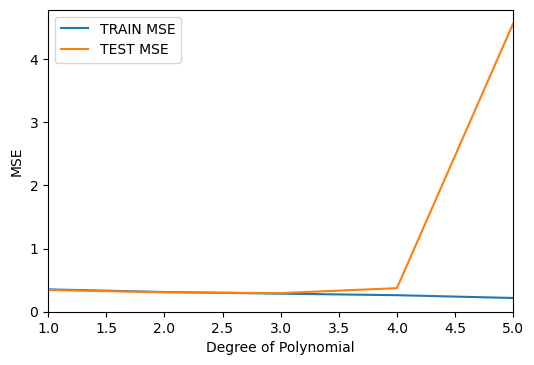

In [49]:
plt.figure(figsize=(6, 4), dpi=100)

plt.plot(range(1, 6) ,train_errors, label="TRAIN MSE")
plt.plot(range(1, 6) ,test_errors, label="TEST MSE")

plt.xlim(1, 5)
plt.ylabel("MSE")
plt.xlabel("Degree of Polynomial")
plt.legend();

- It looks like that when the degree of the polynomial is around 4, the test MSE begins to spike.
    
    $\boldsymbol{\rightarrow} \,$ Let's choose 4 as the degree of the polynomial for the model.

In [50]:
final_p_converter = PolynomialFeatures(degree=4, include_bias=False)

In [51]:
final_p_model = LinearRegression()

In [52]:
converted_X = final_p_converter.fit_transform(X)

In [53]:
print(X.shape)
print(converted_X.shape)

(30000, 11)
(30000, 1364)


- As seen above, when degree=4, a large amount of features are generated.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(converted_X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [55]:
print(f"X_train dimensions: {X_train.shape}")
print(f"y_train dimensions: {y_train.shape}")
print(f"X_test dimensions: {X_test.shape}")
print(f"y_test dimensions: {y_test.shape}")

X_train dimensions: (21000, 1364)
y_train dimensions: (21000,)
X_test dimensions: (9000, 1364)
y_test dimensions: (9000,)


In [56]:
final_p_model.fit(X_train, y_train)

LinearRegression()

In [57]:
label_pred = final_p_model.predict(X_test)

In [58]:
mean_squared_error(y_test, label_pred)

0.5965946288172969

In [59]:
print(f"Ridge regression MSE: {mean_squared_error(y_test, ridge_cv_preds)}")
print(f"LASSO regression MSE: {mean_squared_error(y_test, lasso_cv_preds)}")
print(f"Elastic Net regression MSE: {mean_squared_error(y_test, elastic_net_model_preds)}")
print(f"Polynomial regression MSE: {mean_squared_error(y_test, label_pred)}")

Ridge regression MSE: 0.34387560853505533
LASSO regression MSE: 0.3639258450525791
Elastic Net regression MSE: 0.3519661379600024
Polynomial regression MSE: 0.5965946288172969


- The polynomial regression performs the worst.

So far we've evaluated the performances of linear models. Next, we're going to evaluate non-linear models.

<br>

# <center>Support Vector Regression<center>

**Support Vector Regression (SVR)** is a type of machine learning algorithm used for regression analysis. The goal of SVR is to find a function that approximates the relationship between the input variables and a continuous target variable, while minimizing the prediction error.

In [63]:
X = df[:, :-1]
y = df[:, -1]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [71]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (21000, 11)
Shape of y_train: (21000,)
Shape of X_test: (9000, 11)
Shape of y_test: (9000,)


In [74]:
# SCALING

scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [77]:
# If you already know that you're going to use a linear kernel,
# then you should use LinearSVR, since it's computationally faster than SVR for linear kernel.
# The downside is that you can't explore any other kernel functions with LinearSVR.
from sklearn.svm import SVR

In [78]:
# Let's create a base model for SVR with the default parameters
base_svr = SVR()

In [79]:
# Fit the model on the TRAINING data
base_svr.fit(scaled_X_train, y_train)

SVR()

In [81]:
base_preds = base_svr.predict(scaled_X_test)

In [82]:
# Evaluate performance
mean_squared_error(y_test, base_preds)

0.2840899189291586

- As one can see, SVR with the default settings (without grid search) performs better than any of the linear models.
- Now, since this was just the base model, we're going to want to improve on this by performing grid search.

In [91]:
parameter_grid = {"C": [0.001, 0.01, 0.1, 0.5, 1],
                  "kernel": ["rbf", "poly", "sigmoid"],
                  "gamma": ["scale", "auto"],
                  "degree": [2, 3, 4],
                  "epsilon": [0, 0.01, 0.1, 0.5, 1, 2]}

- Note that only the *polynomial kernel* is going to use the **degree** hyperparameter.
- **epsilon** is the error you're willing to allow per training data instance (you typically want to start with small epsilon values and gradually work up to some higher values).

In [86]:
from sklearn.model_selection import GridSearchCV

In [92]:
svr = SVR()

In [93]:
grid_svr = GridSearchCV(svr, parameter_grid)

In [94]:
grid_svr.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

In [95]:
# Check the best parameters
grid_svr.best_params_

{'C': 1, 'degree': 2, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

In [97]:
grid_svr_preds = grid_svr.predict(scaled_X_test)

In [98]:
mean_squared_error(y_test, grid_svr_preds)

0.28408991892799473

- Technically this error acquired using grid search and cross validation is smaller than the one acquired using the default settings.
- However, the reason why *base_svr* and *grid_svr* have so similar errors is that if you take a look at the best parameters found using GridSearchCV, they are basically the **default** parameters (gamma is "scale" on default, but GridSearchCV found that "auto" performs betters. Other than that, GridSearchCV returned the default parameters).

In [99]:
print(f"Ridge regression MSE: {mean_squared_error(y_test, ridge_cv_preds)}")
print(f"LASSO regression MSE: {mean_squared_error(y_test, lasso_cv_preds)}")
print(f"Elastic Net regression MSE: {mean_squared_error(y_test, elastic_net_model_preds)}")
print(f"Polynomial regression MSE: {mean_squared_error(y_test, label_pred)}")
print(f"SVR (default settings) MSE: {mean_squared_error(y_test, base_preds)}")
print(f"SVR (GridSearchCV) MSE: {mean_squared_error(y_test, grid_svr_preds)}")

Ridge regression MSE: 0.34387560853505533
LASSO regression MSE: 0.3639258450525791
Elastic Net regression MSE: 0.3519661379600024
Polynomial regression MSE: 0.5965946288172969
SVR (default settings) MSE: 0.2840899189291586
SVR (GridSearchCV) MSE: 0.28408991892799473


- These are all the models that were trained in order to predict the quality of wine.
- The performance evaluation was conducted using mean squared error (MSE).
- The best model was found using a non-linear method (**SVR**).

**Saving and loading the best model**

In [101]:
from joblib import dump, load

- https://scikit-learn.org/stable/model_persistence.html

In [105]:
dump(grid_svr, "Kiukkonen_Jamin.joblib")

['Kiukkonen_Jamin.joblib']

In [106]:
loaded_model = load("Kiukkonen_Jamin.joblib")

In [107]:
loaded_model

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

# Summary

Among the linear regression models, Ridge regression achieved the lowest MSE (0.3439), indicating relatively low average squared difference between the predicted and actual values. LASSO regression had a slightly higher MSE (0.3639) compared to Ridge regression, while Elastic Net regression performed similarly to LASSO regression with a slightly lower MSE (0.3520). Polynomial regression performed by far the worst among the linear regression models with an MSE value of 0.5966. As for the non-linear regression, Support Vector Regression (SVR) was used. SVR performed the best, indicating that a non-linear curve might be a better fit to the data compared to a linear curve.